In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [100]:
df1=pd.read_csv("LT Analysis 07 03 - updated.csv")

In [101]:
df1.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,FleetType,IsAddRack,IsFirstFootprint,IsMainstream,IsNewRack,IsNPI,PlanEnvironmentName,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanNumberOfRacks,PlanNumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,PriorityStackRank,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,SKUNumberOfRacks,SKUNumberOfServers,CT Signal to LIve,CT Signal to Dock
0,True,False,NaN,NaN,Azure,Compute,NaN,NaN,False,Not Mainstream,NaN,False,Production,Asia Pacific,Growth,20,800.0,20,NaN,99-ZZ No Priority,Azure Compute APAC,NaN,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,20,800.0,124.0,31.0
1,False,False,NaN,NaN,Azure,Storage,NaN,NaN,False,Not Mainstream,NaN,False,Production,Asia Pacific,Growth,20,280.0,20,NaN,99-ZZ No Priority,Azure Storage APAC,NaN,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,20,280.0,126.0,42.0
2,True,False,NaN,NaN,Azure,Compute,NaN,NaN,False,Not Mainstream,NaN,False,Production,Europe,Growth,20,800.0,20,NaN,99-ZZ No Priority,Azure Compute EMEA,NaN,PRD,West Europe,Not Restricted,Hero,0,PreRack,20,800.0,198.0,31.0
3,False,False,NaN,NaN,Azure,XIO Compute,NaN,NaN,False,Not Mainstream,NaN,False,Production,United States,Growth,20,880.0,20,NaN,99-ZZ No Priority,Azure Compute US,NaN,PRD,West US,Not Restricted,Hub,0,PreRack,20,880.0,207.0,49.0
4,False,False,NaN,NaN,Azure,Xtransport,NaN,NaN,False,Not Mainstream,NaN,False,Production,CHINA,Growth,1,14.0,1,NaN,99-ZZ No Priority,Azure China Storage,NaN,PRD,China East,Restricted,Satellite,0,PreRack,1,14.0,737.0,49.0


In [4]:
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [102]:
summary_table(df1)

Dataset Shape: (1245, 32)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,NewRegionFlag,bool,0,2
2,ColoReady At PlanReservationStart Flag,float64,549,2
3,DeploymentSeverity,float64,263,3
4,EngineeringGroup,object,0,11
5,PlanResourceTypeName,object,0,78
6,FleetType,object,1235,1
7,IsAddRack,float64,597,2
8,IsFirstFootprint,bool,0,2
9,IsMainstream,object,0,2


In [103]:
#Let's check how much % missing values present in each feature 
for feature in df1.columns:
    print("{}: {}% missing values".format(feature,np.round(df1[feature].isnull().mean()*100,3)))

NewDCFlag: 0.0% missing values
NewRegionFlag: 0.0% missing values
ColoReady At PlanReservationStart Flag: 44.096% missing values
DeploymentSeverity: 21.124% missing values
EngineeringGroup: 0.0% missing values
PlanResourceTypeName: 0.0% missing values
FleetType: 99.197% missing values
IsAddRack: 47.952% missing values
IsFirstFootprint: 0.0% missing values
IsMainstream: 0.0% missing values
IsNewRack: 80.884% missing values
IsNPI: 0.0% missing values
PlanEnvironmentName: 74.538% missing values
PlanGEO: 0.0% missing values
PlanIntentName: 0.0% missing values
NumberOfRacks: 0.0% missing values
NumberOfServers: 0.884% missing values
PlanNumberOfRacks: 0.0% missing values
PlanNumberOfServers: 69.478% missing values
PlanOrderPriorityName: 0.161% missing values
PlanPropertyGroupName: 0.161% missing values
PriorityStackRank: 88.273% missing values
ProjectCategory: 7.149% missing values
Region: 0.0% missing values
RegionGroup: 0.0% missing values
RegionType: 0.482% missing values
SKU Avaliable F

In [104]:
# We are going to drop those features in which missing values are more than 50%
drop_feature=["FleetType","IsNewRack","PlanEnvironmentName","PlanNumberOfServers","PriorityStackRank"]

df1.drop(drop_feature,axis=1,inplace=True)

In [105]:
#Lets fix the datatypes of each feature (Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
bool_features_list

['NewDCFlag', 'NewRegionFlag', 'IsFirstFootprint', 'IsNPI']

In [106]:
df1[bool_features_list] = df1[bool_features_list].astype('object')

In [107]:
categorical_features_list= [feature for feature in df1.columns if df1[feature].dtype =="object"]
categorical_features_list

['NewDCFlag',
 'NewRegionFlag',
 'EngineeringGroup',
 'PlanResourceTypeName',
 'IsFirstFootprint',
 'IsMainstream',
 'IsNPI',
 'PlanGEO',
 'PlanIntentName',
 'PlanOrderPriorityName',
 'PlanPropertyGroupName',
 'ProjectCategory',
 'Region',
 'RegionGroup',
 'RegionType',
 'SKUCategoryName']

In [108]:
aditional_features= ['SKU Avaliable Flag','DeploymentSeverity','ColoReady At PlanReservationStart Flag','IsAddRack']
df1[aditional_features] = df1[aditional_features].astype('object')

In [109]:
summary_table(df1)

Dataset Shape: (1245, 27)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,object,0,2
1,NewRegionFlag,object,0,2
2,ColoReady At PlanReservationStart Flag,object,549,2
3,DeploymentSeverity,object,263,3
4,EngineeringGroup,object,0,11
5,PlanResourceTypeName,object,0,78
6,IsAddRack,object,597,2
7,IsFirstFootprint,object,0,2
8,IsMainstream,object,0,2
9,IsNPI,object,0,2


In [110]:
df2=df1.copy()

In [111]:
#Encoding the catogories into String first and then used Label Encoder while Building a tree
d = {0.0:'No',1.0:'Yes'}
df2["ColoReady At PlanReservationStart Flag"] = df2["ColoReady At PlanReservationStart Flag"].replace(d)
df2["IsAddRack"]=df2["IsAddRack"].replace(d)

In [112]:
#Lets Fill the NA values in above two features 
df2["ColoReady At PlanReservationStart Flag"]=df2["ColoReady At PlanReservationStart Flag"].fillna("missing")
df2['IsAddRack']=df2['IsAddRack'].fillna("missing")

In [113]:
df2['DeploymentSeverity']=df2['DeploymentSeverity'].fillna(5)

In [114]:
df2["ProjectCategory"]=df2["ProjectCategory"].fillna(df2["ProjectCategory"].mode()[0])
df2["NumberOfServers"]=df2["NumberOfServers"].fillna(df2["NumberOfServers"].median())
df2["SKUNumberOfServers"]=df2["SKUNumberOfServers"].fillna(df2["SKUNumberOfServers"].median())

In [115]:
summary_table(df2)

Dataset Shape: (1245, 27)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,object,0,2
1,NewRegionFlag,object,0,2
2,ColoReady At PlanReservationStart Flag,object,0,3
3,DeploymentSeverity,float64,0,4
4,EngineeringGroup,object,0,11
5,PlanResourceTypeName,object,0,78
6,IsAddRack,object,0,3
7,IsFirstFootprint,object,0,2
8,IsMainstream,object,0,2
9,IsNPI,object,0,2


In [116]:
#Lets Drop the rest of the NA Values
df2.dropna(inplace=True)

In [117]:
df2.shape

(1124, 27)

In [118]:
float_features=[feature for feature in df2.columns if df2[feature].dtype=='int64']
df2[float_features] = df2[float_features].astype('float64')

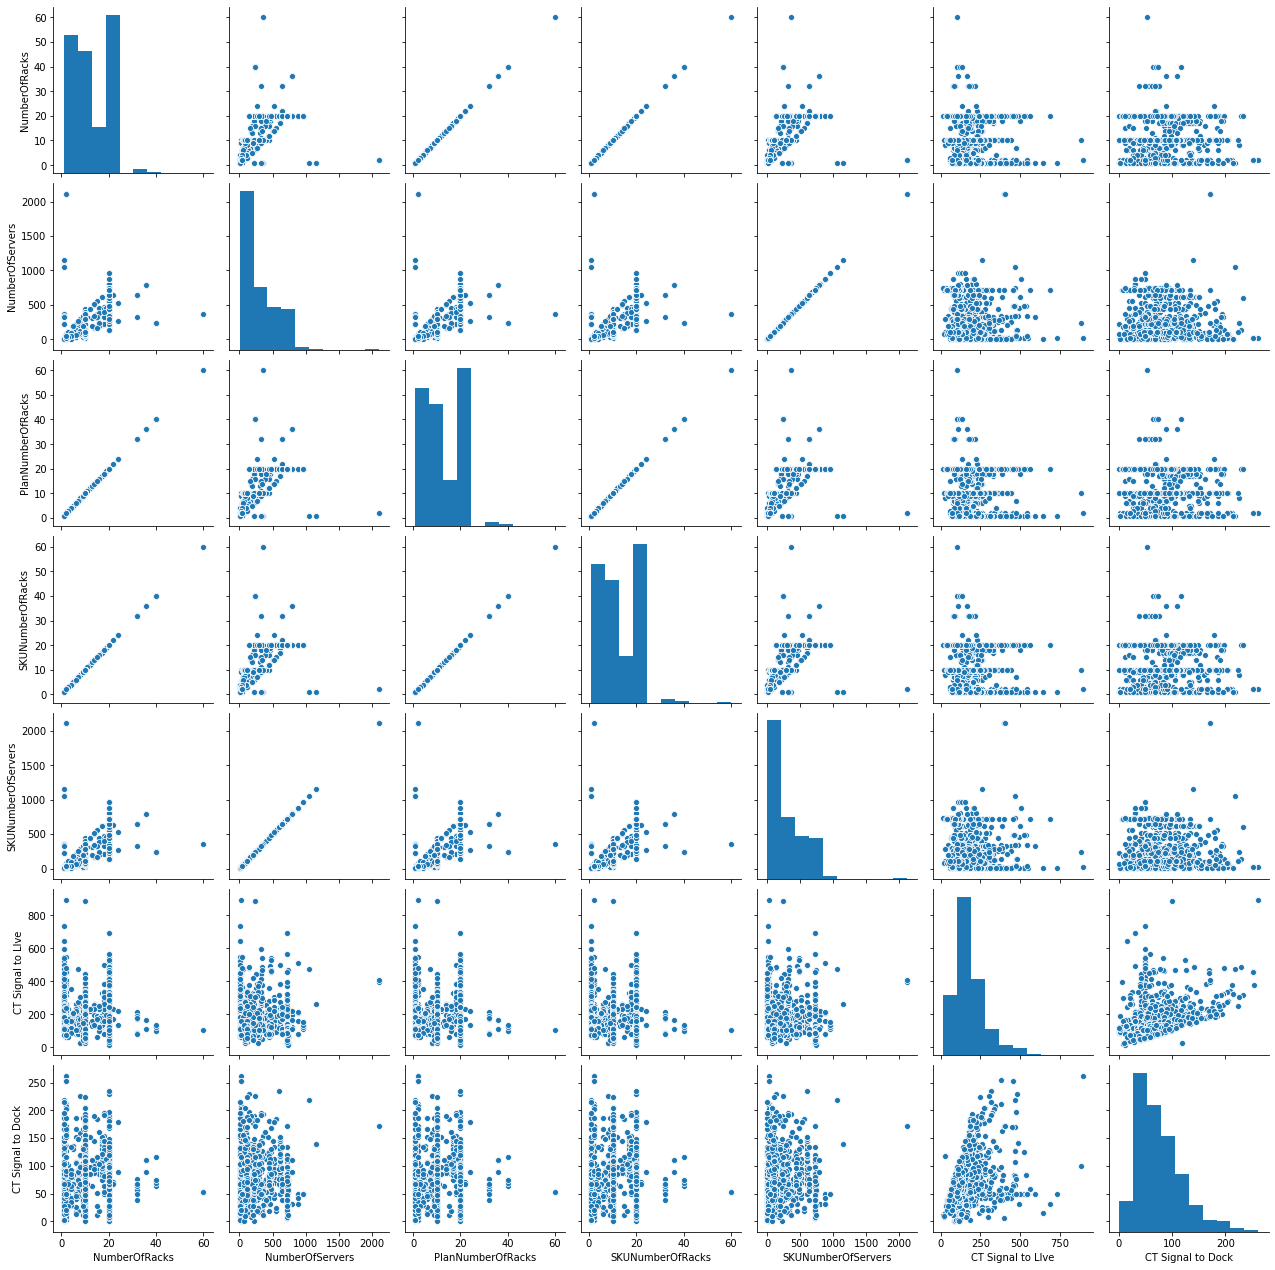

In [22]:
#Lest see the relation between predictors and Target varibales
sns.pairplot(df2.select_dtypes(include='float64'))

In [119]:
#NumberOfServers is same as PlanNumberofServers, SKUNumberOfServers
#NumberOfRacks is same as PlanNumberofRacks, SKUNumberOfRacks
#So lets drop these repetaed features 
df2.drop(["PlanNumberOfRacks","SKUNumberOfServers","SKUNumberOfRacks"],axis=1,inplace=True)

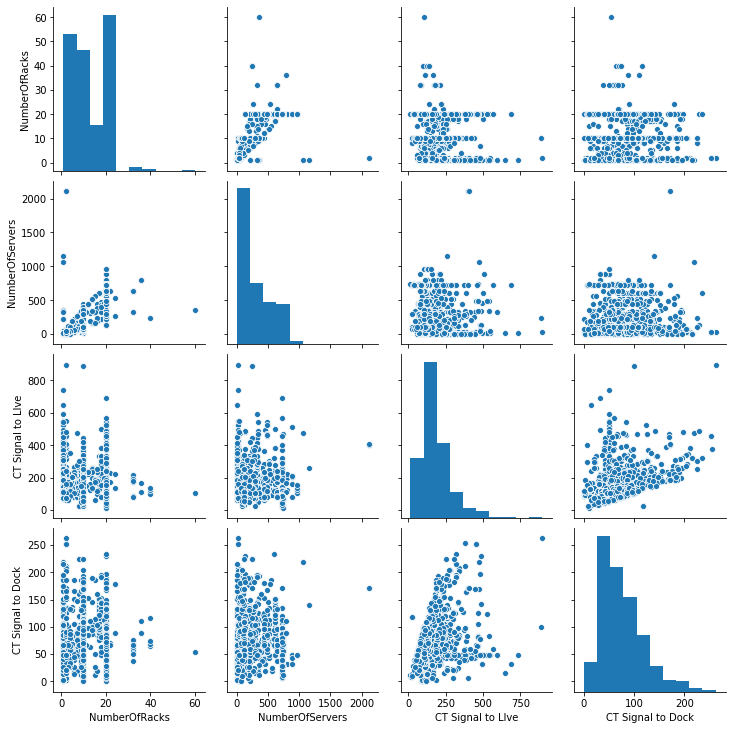

In [24]:
#Lest see the relation between predictors and Target varibales
sns.pairplot(df2.select_dtypes(include='float64'))

In [120]:
#Lets deal with Rare Catogorical Varibales
for feature in categorical_features_list:
    temp=df2.groupby(feature)['CT Signal to LIve'].count()/len(df2)
    temp_df=temp[temp>0.01].index
    df2[feature]=np.where(df2[feature].isin(temp_df),df2[feature],'Rare_var')

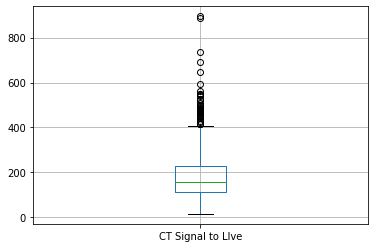

In [121]:
#Now Lets check the Outliers
df2.boxplot(column="CT Signal to LIve") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

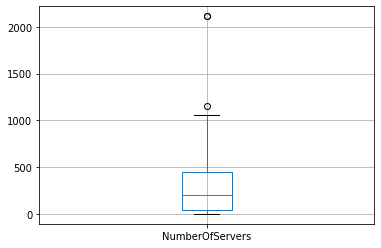

In [122]:
df2.boxplot(column="NumberOfServers") #Lets See the extream values in NumberOfServers  
plt.show()

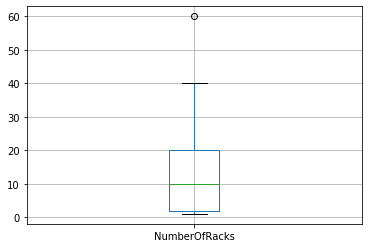

In [123]:
df2.boxplot(column="NumberOfRacks") #Lets See the extream values in NumberOfRacks  
plt.show()

In [124]:
df2.describe()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,3.921708,11.868327,275.290036,182.361210,75.794484
std,0.767268,8.126258,264.988461,102.797588,42.618329
min,2.000000,1.000000,2.000000,15.000000,0.000000
25%,4.000000,2.000000,40.000000,113.000000,49.000000
50%,4.000000,10.000000,200.000000,155.000000,66.000000
75%,4.000000,20.000000,450.000000,230.250000,99.000000
max,5.000000,60.000000,2112.000000,895.000000,262.000000


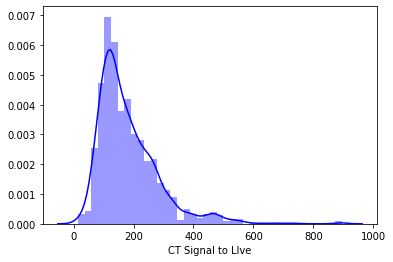

In [125]:
sns.distplot(df2["CT Signal to LIve"], color="blue",kde=True) #Lets see the distribusion curve

In [126]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df1[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

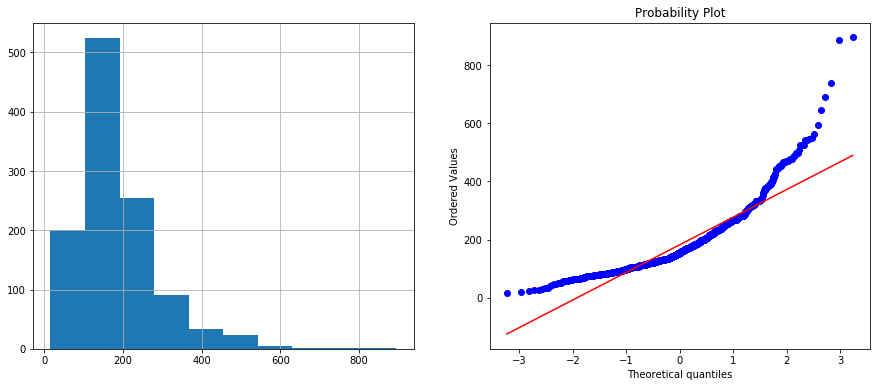

In [32]:
diagnostic_plots(df2, "CT Signal to LIve")

In [119]:
#Lets Get the Rid Of Outliers now 

In [127]:
Q1=df2['CT Signal to LIve'].quantile(0.25)
Q3=df2['CT Signal to LIve'].quantile(0.75)
Q1,Q3

(113.0, 230.25)

In [128]:
IQR=Q3-Q1
IQR

117.25

In [129]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-62.875, 406.125)

In [130]:
df2[df2['CT Signal to LIve']>upper_limit].shape

(46, 24)

In [124]:
#Lets check for NumberOfServers 

In [131]:
Q1=df2['NumberOfServers'].quantile(0.25)
Q3=df2['NumberOfServers'].quantile(0.75)
Q1,Q3

(40.0, 450.0)

In [132]:
IQR=Q3-Q1
IQR

410.0

In [133]:
lower_limit1 = Q1 - 1.5*IQR
upper_limit1 = Q3 + 1.5*IQR
lower_limit1, upper_limit1

(-575.0, 1065.0)

In [134]:
df2[df2['NumberOfServers']>upper_limit1]

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
429,False,False,missing,5.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,2.0,2112.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,0,Rare_var,398.0,171.0
430,False,False,missing,5.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,2.0,2112.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,0,Rare_var,406.0,171.0
475,False,False,missing,4.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,1.0,1152.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,1,Rare_var,262.0,140.0


In [135]:
#3 Std Deviation
upper_limit2 = df2['NumberOfServers'].mean() + 3*df2['NumberOfServers'].std()
upper_limit1

1065.0

In [136]:
#Percentiles
min_thresold, max_thresold = df2['NumberOfServers'].quantile([0.000, 0.995])
min_thresold, max_thresold

(2.0, 960.0)

In [137]:
df2[df2['NumberOfServers']>max_thresold]

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
428,False,False,missing,5.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,1.0,1056.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,0,Rare_var,472.0,219.0
429,False,False,missing,5.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,2.0,2112.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,0,Rare_var,398.0,171.0
430,False,False,missing,5.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,2.0,2112.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,0,Rare_var,406.0,171.0
475,False,False,missing,4.0,Search,Search,missing,False,Not Mainstream,False,United States,Growth,1.0,1152.0,99-ZZ No Priority,Search,Rare_var,West US 2,Not Restricted,Hero,1,Rare_var,262.0,140.0


In [138]:
Q1=df2['NumberOfRacks'].quantile(0.25)
Q3=df2['NumberOfRacks'].quantile(0.75)
Q1,Q3

(2.0, 20.0)

In [139]:
IQR=Q3-Q1
IQR

18.0

In [140]:
lower_limit2 = Q1 - 1.5*IQR
upper_limit2 = Q3 + 1.5*IQR
lower_limit2, upper_limit2

(-25.0, 47.0)

In [141]:
df2[df2['NumberOfRacks']>upper_limit2]

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
492,False,False,Yes,3.0,Azure,Rare_var,No,False,Not Mainstream,True,United States,Growth,60.0,360.0,99-ZZ No Priority,Azure GPU,PRD,South Central US,Not Restricted,Hero,1,Rack,104.0,53.0


In [142]:
#removal of outliers in CT_To_Live feature by considering IQR method 
df2= df2[(df2['CT Signal to LIve']<upper_limit)]

In [143]:
#removal of outliers in NumberOfServers feature by considering Persentile method
df2= df2[(df2['NumberOfServers']<max_thresold)]

In [144]:
#removal of outliers in NumberOfRacks feature by considering IQR method
df2= df2[(df2['NumberOfRacks']<upper_limit2)]

In [145]:
df2.describe()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,CT Signal to LIve,CT Signal to Dock
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,3.892523,11.862617,267.491589,168.006542,75.107477
std,0.759499,7.951373,247.972126,75.200443,41.090635
min,2.000000,1.000000,2.000000,15.000000,0.000000
25%,3.250000,3.000000,41.000000,113.000000,48.000000
50%,4.000000,10.000000,198.000000,150.000000,66.000000
75%,4.000000,20.000000,440.000000,217.000000,98.000000
max,5.000000,40.000000,880.000000,400.000000,254.000000


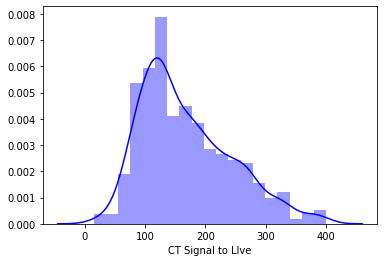

In [146]:
sns.distplot(df2["CT Signal to LIve"], color="blue",kde=True) #Lets see the distribusion curve

In [147]:
#As per the observations, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains almost a single catogory
df2.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [148]:
df2.shape

(1070, 21)

In [149]:
df2.to_csv("LT_Processed_without_Outliers.csv",index=0,columns=df2.columns)

In [150]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5.0,Azure,XIO Compute,missing,False,False,United States,Growth,20.0,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
6,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,North Europe,Not Restricted,Hero,0,PreRack,221.0,31.0


In [151]:
summary_table(df2)

Dataset Shape: (1070, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,object,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,float64,0,4
3,EngineeringGroup,object,0,6
4,PlanResourceTypeName,object,0,31
5,IsAddRack,object,0,3
6,IsFirstFootprint,object,0,2
7,IsNPI,object,0,2
8,PlanGEO,object,0,14
9,PlanIntentName,object,0,7


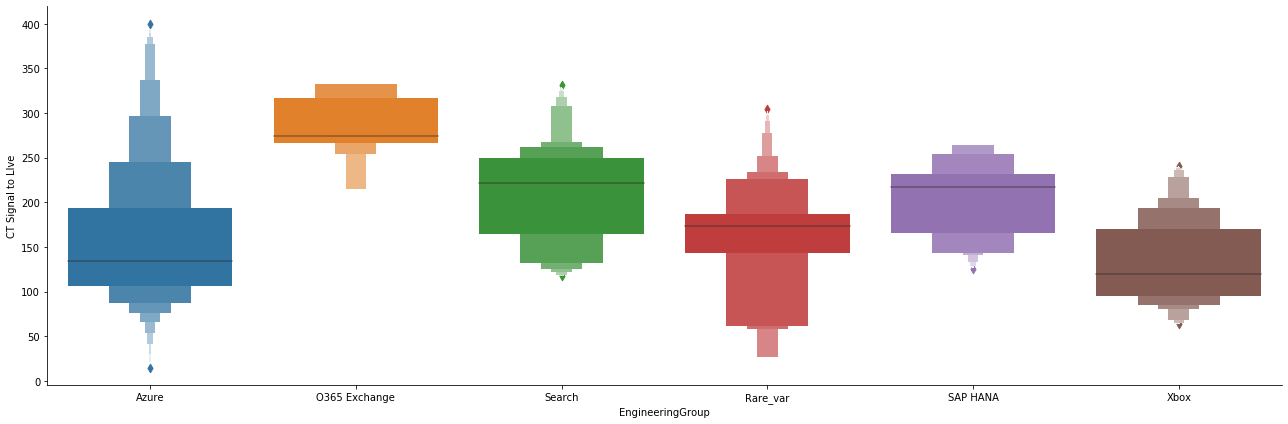

In [59]:
sns.catplot(y = "CT Signal to LIve", x = "EngineeringGroup", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

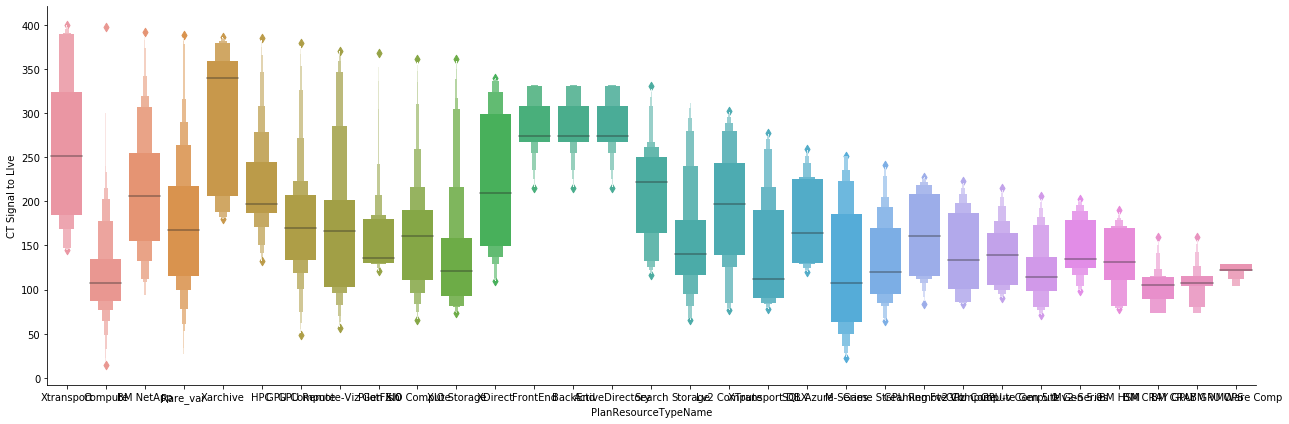

In [62]:
sns.catplot(y = "CT Signal to LIve", x = "PlanResourceTypeName", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

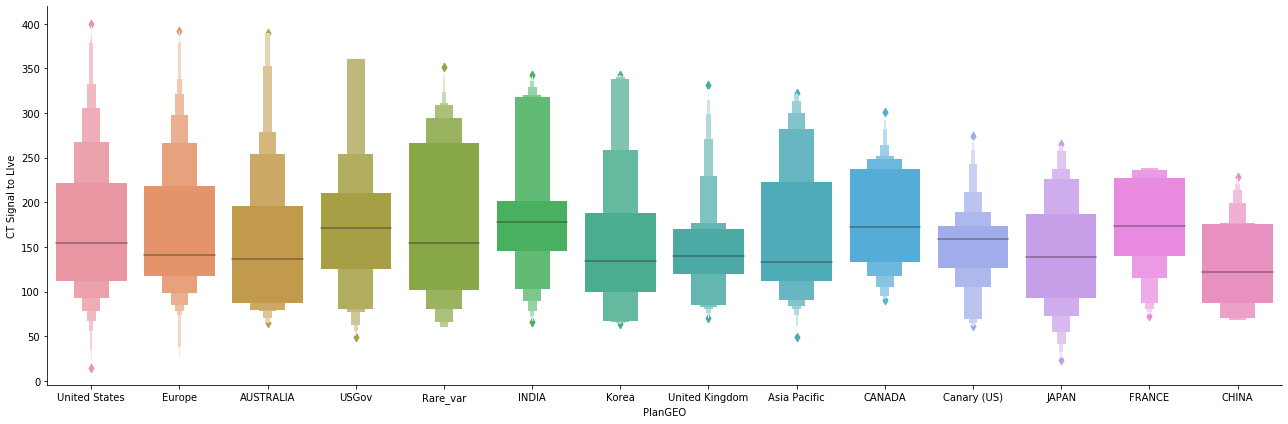

In [63]:
sns.catplot(y = "CT Signal to LIve", x = "PlanGEO", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

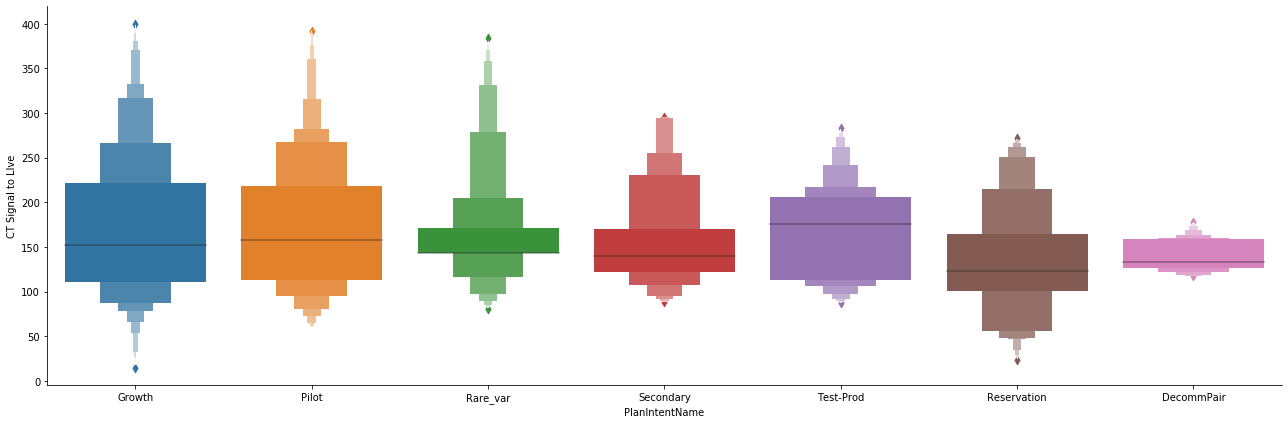

In [64]:
sns.catplot(y = "CT Signal to LIve", x = "PlanIntentName", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

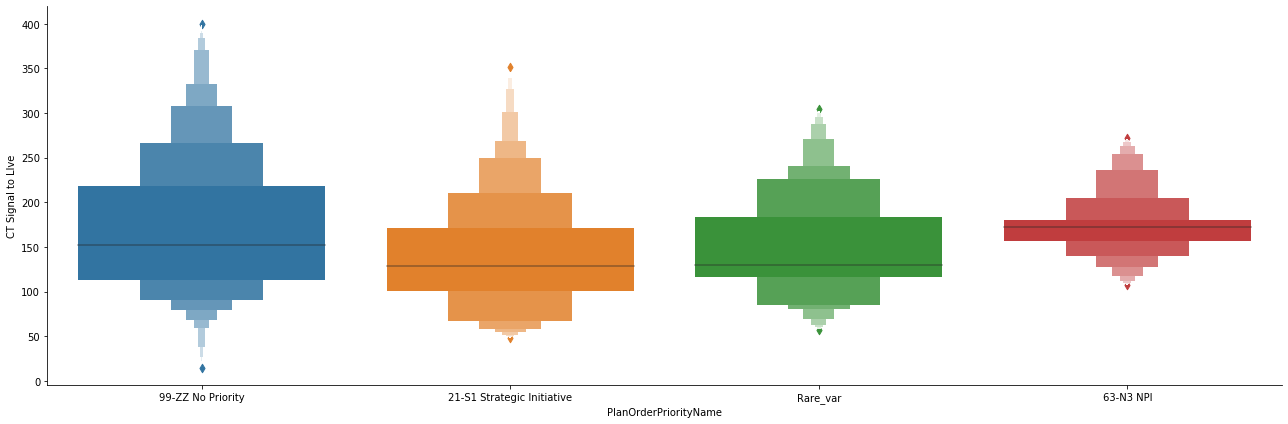

In [65]:
sns.catplot(y = "CT Signal to LIve", x = "PlanOrderPriorityName", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

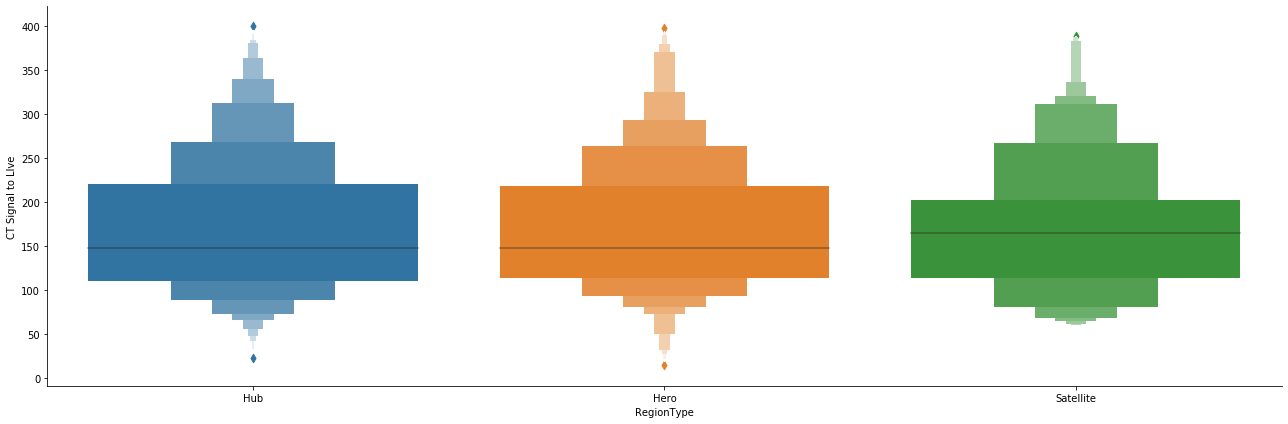

In [66]:
sns.catplot(y = "CT Signal to LIve", x = "RegionType", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

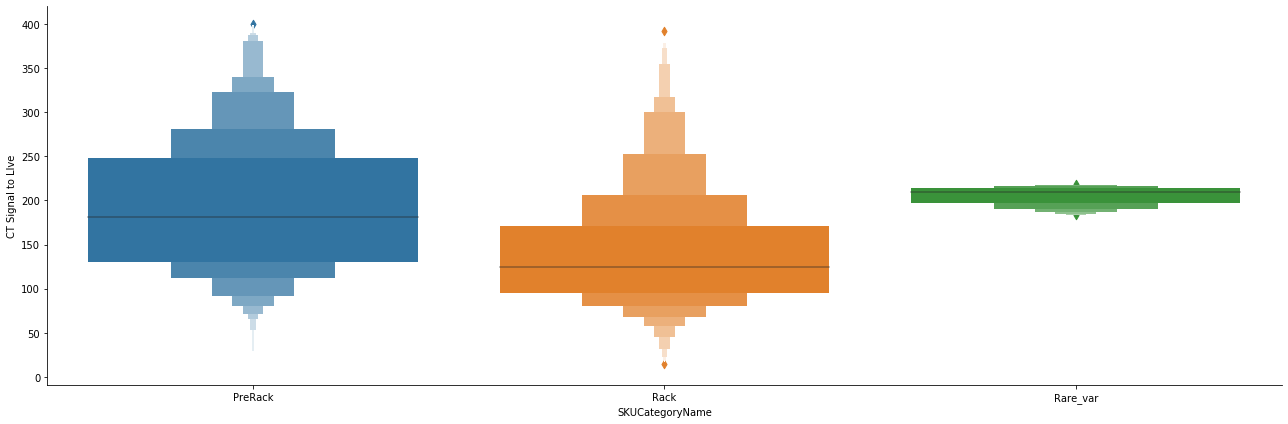

In [67]:
sns.catplot(y = "CT Signal to LIve", x = "SKUCategoryName", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

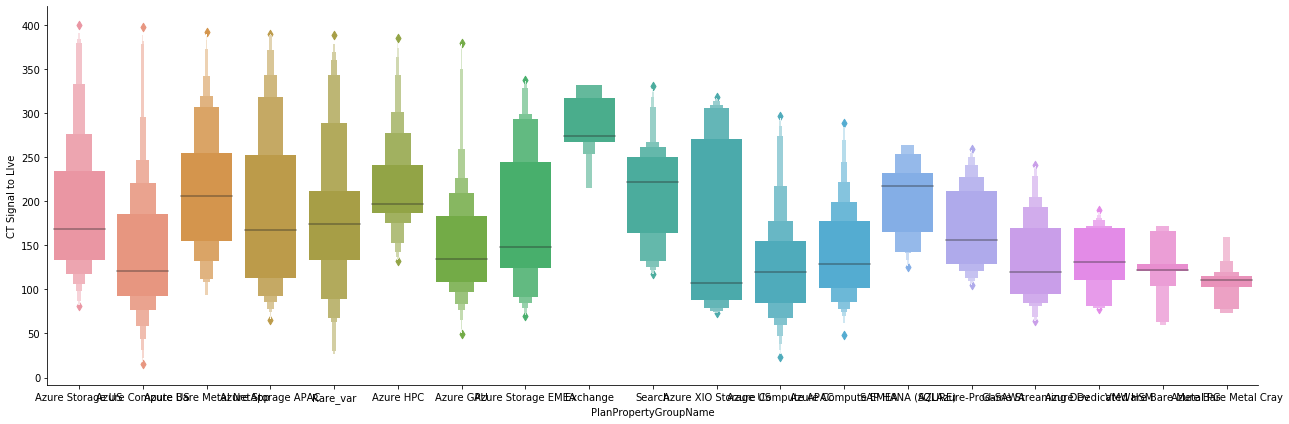

In [68]:
sns.catplot(y = "CT Signal to LIve", x = "PlanPropertyGroupName", data = df2.sort_values("CT Signal to LIve", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
df2.to_

In [152]:
df3=df2.copy()

In [153]:
df3.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5.0,Azure,XIO Compute,missing,False,False,United States,Growth,20.0,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
6,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,North Europe,Not Restricted,Hero,0,PreRack,221.0,31.0


In [ ]:
#Lets do OneHot Encoding for all below Nominal Features

In [154]:
NewDCFlag = df3[["NewDCFlag"]]
NewDCFlag = pd.get_dummies(NewDCFlag, drop_first= True)
NewDCFlag.head()

,NewDCFlag_True
0,1
1,0
2,1
3,0
6,1


In [155]:
df3['ColoReady At PlanReservationStart Flag'].value_counts()

missing    456
Yes        420
No         194
Name: ColoReady At PlanReservationStart Flag, dtype: int64

In [156]:
ColoReady = df3[["ColoReady At PlanReservationStart Flag"]]
ColoReady = pd.get_dummies(ColoReady, drop_first= True)
ColoReady.head()

,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing
0,0,1
1,0,1
2,0,1
3,0,1
6,0,1


In [157]:
EG = df3[["EngineeringGroup"]]
EG = pd.get_dummies(EG, drop_first= True)
EG.head()

,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
6,0,0,0,0,0


In [158]:
PlanR = df3[["PlanResourceTypeName"]]
PlanR = pd.get_dummies(PlanR, drop_first= True)
PlanR.head()

,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
addrack = df3[["IsAddRack"]]
addrack = pd.get_dummies(addrack, drop_first= True)
addrack.head()

,IsAddRack_Yes,IsAddRack_missing
0,0,1
1,0,1
2,0,1
3,0,1
6,0,1


In [160]:
firstfoot = df3[["IsFirstFootprint"]]
firstfoot = pd.get_dummies(firstfoot, drop_first= True)
firstfoot.head()

,IsFirstFootprint_True
0,0
1,0
2,0
3,0
6,0


In [161]:
IsNPI = df3[["IsNPI"]]
IsNPI = pd.get_dummies(IsNPI, drop_first= True)
IsNPI.head()

,IsNPI_True
0,0
1,0
2,0
3,0
6,0


In [162]:
PlanGEO = df3[["PlanGEO"]]
PlanGEO = pd.get_dummies(PlanGEO, drop_first= True)
PlanGEO.head()

,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,0,0,0


In [163]:
PlanIntentName = df3[["PlanIntentName"]]
PlanIntentName = pd.get_dummies(PlanIntentName, drop_first= True)
PlanIntentName.head()

,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
6,1,0,0,0,0,0


In [164]:
PlanOrderPriorityName = df3[["PlanOrderPriorityName"]]
PlanOrderPriorityName = pd.get_dummies(PlanOrderPriorityName, drop_first= True)
PlanOrderPriorityName.head()

,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
6,0,1,0


In [165]:
PlanPropertyGroupName = df3[["PlanPropertyGroupName"]]
PlanPropertyGroupName = pd.get_dummies(PlanPropertyGroupName, drop_first= True)
PlanPropertyGroupName.head()

,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
Region = df3[["Region"]]
Region = pd.get_dummies(Region, drop_first= True)
Region.head()

,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
RegionGroup = df3[["RegionGroup"]]
RegionGroup = pd.get_dummies(RegionGroup, drop_first= True)
RegionGroup.head()

,RegionGroup_Rare_var,RegionGroup_Restricted
0,0,0
1,0,0
2,0,0
3,0,0
6,0,0


In [168]:
RegionType = df3[["RegionType"]]
RegionType = pd.get_dummies(RegionType, drop_first= True)
RegionType.head()

,RegionType_Hub,RegionType_Satellite
0,0,0
1,0,0
2,0,0
3,1,0
6,0,0


In [169]:
SKUCategoryName = df3[["SKUCategoryName"]]
SKUCategoryName = pd.get_dummies(SKUCategoryName, drop_first= True)
SKUCategoryName.head()

,SKUCategoryName_Rack,SKUCategoryName_Rare_var
0,0,0
1,0,0
2,0,0
3,0,0
6,0,0


In [170]:
#Lest do Lebel encoding for below ordinal feature
df3['DeploymentSeverity'].value_counts()

4.0    597
3.0    216
5.0    205
2.0     52
Name: DeploymentSeverity, dtype: int64

In [171]:
encode={ 5.0: 0,4.0: 1, 3.0: 2, 2.0: 3}
df3['DeploymentSeverity'].replace(encode, inplace = True)

In [172]:
df3['DeploymentSeverity'].value_counts()

1.0    597
2.0    216
0.0    205
3.0     52
Name: DeploymentSeverity, dtype: int64

In [173]:
df3.columns

Index(['NewDCFlag', 'ColoReady At PlanReservationStart Flag',
       'DeploymentSeverity', 'EngineeringGroup', 'PlanResourceTypeName',
       'IsAddRack', 'IsFirstFootprint', 'IsNPI', 'PlanGEO', 'PlanIntentName',
       'NumberOfRacks', 'NumberOfServers', 'PlanOrderPriorityName',
       'PlanPropertyGroupName', 'Region', 'RegionGroup', 'RegionType',
       'SKU Avaliable Flag', 'SKUCategoryName', 'CT Signal to LIve',
       'CT Signal to Dock'],
      dtype='object')

In [174]:
#Now lets concat all the data frames with df3
df4=pd.concat([df3,NewDCFlag,ColoReady,EG,PlanR,addrack,firstfoot,IsNPI,PlanGEO,PlanIntentName,PlanOrderPriorityName,Region,
              RegionGroup,RegionType,PlanPropertyGroupName,SKUCategoryName],axis=1)

In [175]:
df4.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2,RegionGroup_Rare_var,RegionGroup_Restricted,RegionType_Hub,RegionType_Satellite,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,SKUCategoryName_Rack,SKUCategoryName_Rare_var
0,True,missing,0.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,missing,0.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [176]:
df4.drop(['NewDCFlag', 'ColoReady At PlanReservationStart Flag',
       'EngineeringGroup', 'PlanResourceTypeName',
       'IsAddRack', 'IsFirstFootprint', 'IsNPI', 'PlanGEO', 'PlanIntentName',
       'PlanOrderPriorityName',
       'PlanPropertyGroupName', 'Region', 'RegionGroup', 'RegionType',
        'SKUCategoryName'],axis=1,inplace=True)

In [177]:
df4.head()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,SKU Avaliable Flag,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2,RegionGroup_Rare_var,RegionGroup_Restricted,RegionType_Hub,RegionType_Satellite,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,SKUCategoryName_Rack,SKUCategoryName_Rare_var
0,0.0,20.0,800.0,0,124.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,20.0,280.0,0,126.0,42.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,20.0,800.0,0,198.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,20.0,880.0,0,207.0,49.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0

In [178]:
df4.shape

(1070, 114)

# Feature Selection

In [180]:
#Lets define X and Y
x=df4.drop(['CT Signal to LIve','CT Signal to Dock'],axis=1)
y=df4['CT Signal to LIve']

In [181]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

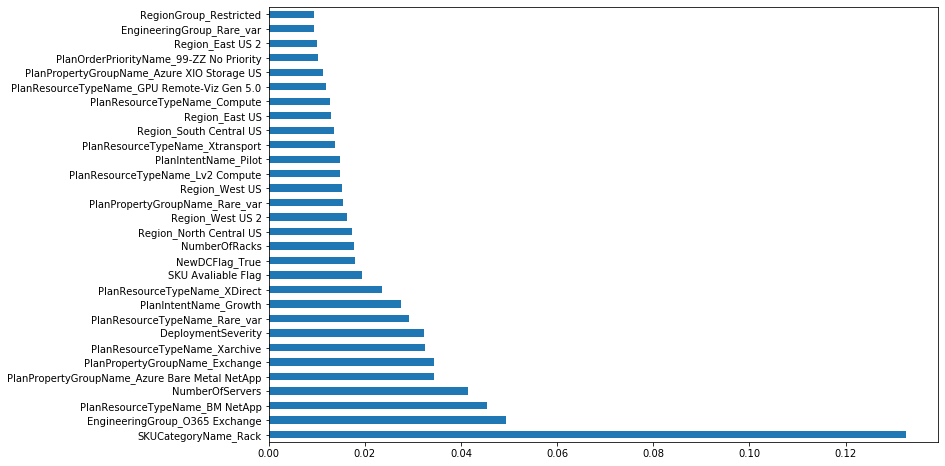

In [184]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [185]:
df4.to_csv("LT_Processed_without_Outliers_Latest.csv",index=0,columns=df4.columns)